In [1]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

def cluster_jerarquico(datos):
  etiquetas = datos[0]
  n_obj = len(etiquetas)
  matriz = np.zeros([n_obj,n_obj])
  valores = np.transpose(datos[1:])
  for i in range(n_obj):
    aux = valores[i]
    for j in range(i+1, n_obj):
      aux2 = abs(aux - valores[j])
      suma = sum(aux2)
      matriz[j,i] = suma
  valores = list(valores)
  print(tabulate(matriz, headers=etiquetas, showindex=etiquetas), "\n")
  pos_min = np.where(matriz == np.max(matriz[np.nonzero(matriz)]))
  pos_min = (pos_min[1][0],pos_min[0][0])
  nueva_etiqueta = etiquetas.pop(pos_min[0])
  nueva_etiqueta += "-"+etiquetas.pop(pos_min[1]-1)
  val1 = valores.pop(pos_min[0])
  val2 = valores.pop(pos_min[1]-1)
  nuevo_valor = (val1 + val2) / 2
  etiquetas.insert(0, nueva_etiqueta)
  valores.insert(0, nuevo_valor)
  valores = list(np.transpose(valores))
  valores.insert(0, etiquetas)
  if np.shape(matriz) == (2,2):
    return None
  else:
    return cluster_jerarquico(valores)


datos = [["A","B","C","D","E"],
         [1,2,4,7,5],
         [1,1,5,7,7]]

cluster_jerarquico(datos)

      A    B    C    D    E
--  ---  ---  ---  ---  ---
A     0    0    0    0    0
B     1    0    0    0    0
C     7    6    0    0    0
D    12   11    5    0    0
E    10    9    3    2    0 

       A-D    B    C    E
---  -----  ---  ---  ---
A-D      0    0    0    0
B        5    0    0    0
C        1    6    0    0
E        4    9    3    0 

       B-E    A-D    C
---  -----  -----  ---
B-E    0        0    0
A-D    0.5      0    0
C      1.5      1    0 

         B-E-C    A-D
-----  -------  -----
B-E-C     0         0
A-D       0.75      0 



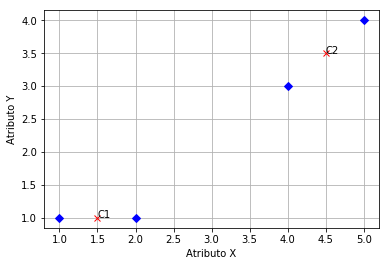

In [2]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

def kmeans(datos, centroides):
  etiquetas = datos[0]
  n_obj = len(etiquetas)
  n_centroides = len(centroides)
  matriz = np.zeros([n_centroides,n_obj])
  valores = np.transpose(datos[1:])
  dict_centroides = {}
  for i in range(n_centroides):
    dict_centroides.update({"c"+str(i+1):{"x":0,"y":0,"c":0}})
    c = centroides[i]
    for j in range(n_obj):
      aux2 = (c - valores[j]) ** 2
      suma = sum(aux2)
      matriz[i,j] = (suma) ** (1/2)
  matriz_aux = np.transpose(matriz)
  for i in range(len(matriz_aux)):
    item = matriz_aux[i]
    if item[0] < item[1]:
      matriz_aux[i][0] = 1
      matriz_aux[i][1] = 0
      dict_centroides["c1"]["c"] += 1
      dict_centroides["c1"]["x"] += valores[i,0]
      dict_centroides["c1"]["y"] += valores[i,1] 
    else:
      matriz_aux[i][0] = 0
      matriz_aux[i][1] = 1
      dict_centroides["c2"]["c"] += 1
      dict_centroides["c2"]["x"] += valores[i,0]
      dict_centroides["c2"]["y"] += valores[i,1] 
  nuevo_centroide = [
      [dict_centroides["c1"]["x"]/dict_centroides["c1"]["c"],dict_centroides["c1"]["y"]/dict_centroides["c1"]["c"]],
      [dict_centroides["c2"]["x"]/dict_centroides["c2"]["c"],dict_centroides["c2"]["y"]/dict_centroides["c2"]["c"]]
  ]
  matriz_aux = np.transpose(matriz_aux)
  if centroides == nuevo_centroide:
    for v in valores:
      plt.plot(v[0],v[1],"D",color="blue")
    cont = 1
    for c in nuevo_centroide:
      plt.plot(c[0],c[1],"x",color="red")
      plt.annotate("C{}".format(cont),c)
      cont += 1
    plt.grid()
    plt.xlabel("Atributo X")
    plt.ylabel("Atributo Y")
    plt.show()
    return None
  else:
    return kmeans(datos, nuevo_centroide)
datos = [["M1","M2","M3","M4"],
         [1,2,4,5],
         [1,1,3,4]]
centroides = [[1,1], [2,1]]
kmeans(datos,centroides)